In [1]:
# Step 1: Import required libraries
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os

# Getting all the datasets and then combining all of it


In [2]:
# Set the folder path containing all the Excel files
data_folder = '/Users/Viryuth/Downloads/'  # Replace this with the correct path to your downloaded files


In [3]:
# Check files in the folder
file_list = glob.glob(os.path.join(data_folder, "median_prices_*.xlsx"))
print(f"Found {len(file_list)} files.")

Found 23 files.


I will combine all the median house price in Adelaide's suburb together (2015-2020)

In [4]:
dfs = []
for fname in file_list:
    df = pd.read_excel(fname)
    df['source_file'] = fname  # optional: indicates origin file
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)


In [5]:
print(combined_df.shape)        # Total rows/columns
print(combined_df.head())       # Preview first few lines
print(combined_df['Suburb'].value_counts().head(10))


(11061, 59)
             City          Suburb  Sales\n4Q 2018  Median\n4Q 2018  \
0        ADELAIDE        ADELAIDE             5.0        1590000.0   
1        ADELAIDE  NORTH ADELAIDE             9.0        1395000.0   
2  ADELAIDE HILLS         ALDGATE             9.0         747500.0   
3  ADELAIDE HILLS          ASHTON             NaN              NaN   
4  ADELAIDE HILLS    BASKET RANGE             1.0         640000.0   

   Sales\n4Q 2019  Median\n4Q 2019  Median\nChange  \
0             4.0         770117.0       -0.515650   
1            10.0        1352500.0       -0.030466   
2            14.0         753250.0        0.007692   
3             NaN              NaN             NaN   
4             1.0         375000.0       -0.414062   

                                         source_file  Sales\n1Q 2019  \
0  /Users/Viryuth/Downloads/median_prices_2019_q4...             NaN   
1  /Users/Viryuth/Downloads/median_prices_2019_q4...             NaN   
2  /Users/Viryuth/Download

In [6]:
print(combined_df.info)     

<bound method DataFrame.info of                  City          Suburb  Sales\n4Q 2018  Median\n4Q 2018  \
0            ADELAIDE        ADELAIDE             5.0        1590000.0   
1            ADELAIDE  NORTH ADELAIDE             9.0        1395000.0   
2      ADELAIDE HILLS         ALDGATE             9.0         747500.0   
3      ADELAIDE HILLS          ASHTON             NaN              NaN   
4      ADELAIDE HILLS    BASKET RANGE             1.0         640000.0   
...               ...             ...             ...              ...   
11056    WEST TORRENS       THEBARTON             NaN              NaN   
11057    WEST TORRENS    TORRENSVILLE             NaN              NaN   
11058    WEST TORRENS       UNDERDALE             NaN              NaN   
11059    WEST TORRENS      WEST BEACH             NaN              NaN   
11060    WEST TORRENS   WEST RICHMOND             NaN              NaN   

       Sales\n4Q 2019  Median\n4Q 2019  Median\nChange  \
0                 4.0

# Data Cleaning

In [7]:
# Step 1: Preview column names and types
column_info = combined_df.dtypes
column_info

City                object
Suburb              object
Sales\n4Q 2018     float64
Median\n4Q 2018    float64
Sales\n4Q 2019     float64
Median\n4Q 2019    float64
Median\nChange     float64
source_file         object
Sales\n1Q 2019     float64
Median\n1Q 2019    float64
Sales\n1Q 2020     float64
Median\n1Q 2020    float64
Sales\n1Q 2015     float64
Median\n1Q 2015    float64
Sales\n1Q 2016     float64
Median\n1Q 2016    float64
Sales\n1Q 2017     float64
Median\n1Q 2017    float64
Sales\n4Q 2017     float64
Median\n4Q 2017    float64
Sales\n1Q 2014     float64
Median\n1Q 2014    float64
Unnamed: 7          object
Sales\n3Q 2017     float64
Median\n3Q 2017    float64
Sales\n3Q 2018     float64
Median\n3Q 2018    float64
Sales\n2Q 2018     float64
Median\n2Q 2018    float64
Sales\n2Q 2019     float64
Median\n2Q 2019    float64
Sales\n3Q 2019     float64
Median\n3Q 2019    float64
Sales\n2Q 2017     float64
Median\n2Q 2017    float64
Sales\n4Q 2016     float64
Median\n4Q 2016    float64
S

In [8]:
# Step 2: Count missing values per column
missing_values = combined_df.isnull().sum()
missing_values

City                   0
Suburb                 0
Sales\n4Q 2018     10268
Median\n4Q 2018    10268
Sales\n4Q 2019     10661
Median\n4Q 2019    10661
Median\nChange      2424
source_file            0
Sales\n1Q 2019     10276
Median\n1Q 2019    10276
Sales\n1Q 2020     10671
Median\n1Q 2020    10671
Sales\n1Q 2015     10241
Median\n1Q 2015    10241
Sales\n1Q 2016     10302
Median\n1Q 2016    10302
Sales\n1Q 2017     10281
Median\n1Q 2017    10281
Sales\n4Q 2017     10263
Median\n4Q 2017    10263
Sales\n1Q 2014     10644
Median\n1Q 2014    10644
Unnamed: 7         11060
Sales\n3Q 2017     10265
Median\n3Q 2017    10265
Sales\n3Q 2018     10275
Median\n3Q 2018    10275
Sales\n2Q 2018     10280
Median\n2Q 2018    10280
Sales\n2Q 2019     10271
Median\n2Q 2019    10271
Sales\n3Q 2019     10284
Median\n3Q 2019    10284
Sales\n2Q 2017     10275
Median\n2Q 2017    10275
Sales\n4Q 2016     10264
Median\n4Q 2016    10266
Sales\n3Q 2014     10671
Median\n3Q 2014    10671
Sales\n3Q 2015     10280


In [9]:
# Step 3: Check for duplicated rows
duplicate_rows = combined_df.duplicated().sum()
duplicate_rows

0

In [10]:

# Step 4: Preview unique values in key columns to assess consistency
unique_suburbs = combined_df['Suburb'].nunique()
unique_columns = combined_df.columns.tolist()

unique_suburbs
unique_columns

['City',
 'Suburb',
 'Sales\n4Q 2018',
 'Median\n4Q 2018',
 'Sales\n4Q 2019',
 'Median\n4Q 2019',
 'Median\nChange',
 'source_file',
 'Sales\n1Q 2019',
 'Median\n1Q 2019',
 'Sales\n1Q 2020',
 'Median\n1Q 2020',
 'Sales\n1Q 2015',
 'Median\n1Q 2015',
 'Sales\n1Q 2016',
 'Median\n1Q 2016',
 'Sales\n1Q 2017',
 'Median\n1Q 2017',
 'Sales\n4Q 2017',
 'Median\n4Q 2017',
 'Sales\n1Q 2014',
 'Median\n1Q 2014',
 'Unnamed: 7',
 'Sales\n3Q 2017',
 'Median\n3Q 2017',
 'Sales\n3Q 2018',
 'Median\n3Q 2018',
 'Sales\n2Q 2018',
 'Median\n2Q 2018',
 'Sales\n2Q 2019',
 'Median\n2Q 2019',
 'Sales\n3Q 2019',
 'Median\n3Q 2019',
 'Sales\n2Q 2017',
 'Median\n2Q 2017',
 'Sales\n4Q 2016',
 'Median\n4Q 2016',
 'Sales\n3Q 2014',
 'Median\n3Q 2014',
 'Sales\n3Q 2015',
 'Median\n3Q 2015',
 'Sales\n1Q 2018',
 'Median\n1Q 2018',
 'Sales\n4Q 2015',
 'Median\n4Q 2015',
 'Sales\n2Q 2014',
 'Median\n2Q 2014',
 'Sales\n2Q 2015',
 'Median\n2Q 2015',
 'Sales\n3Q 2020',
 'Median\n3Q 2020',
 'Sales\n2Q 2016',
 'Median\n2Q 2

In [11]:
# Step 1: Preview column names and data types
print("Column data types:\n", combined_df.dtypes)

Column data types:
 City                object
Suburb              object
Sales\n4Q 2018     float64
Median\n4Q 2018    float64
Sales\n4Q 2019     float64
Median\n4Q 2019    float64
Median\nChange     float64
source_file         object
Sales\n1Q 2019     float64
Median\n1Q 2019    float64
Sales\n1Q 2020     float64
Median\n1Q 2020    float64
Sales\n1Q 2015     float64
Median\n1Q 2015    float64
Sales\n1Q 2016     float64
Median\n1Q 2016    float64
Sales\n1Q 2017     float64
Median\n1Q 2017    float64
Sales\n4Q 2017     float64
Median\n4Q 2017    float64
Sales\n1Q 2014     float64
Median\n1Q 2014    float64
Unnamed: 7          object
Sales\n3Q 2017     float64
Median\n3Q 2017    float64
Sales\n3Q 2018     float64
Median\n3Q 2018    float64
Sales\n2Q 2018     float64
Median\n2Q 2018    float64
Sales\n2Q 2019     float64
Median\n2Q 2019    float64
Sales\n3Q 2019     float64
Median\n3Q 2019    float64
Sales\n2Q 2017     float64
Median\n2Q 2017    float64
Sales\n4Q 2016     float64
Median\n

In [12]:
# Step 2: Count missing values in each column
print("\nMissing values per column:\n", combined_df.isnull().sum())


Missing values per column:
 City                   0
Suburb                 0
Sales\n4Q 2018     10268
Median\n4Q 2018    10268
Sales\n4Q 2019     10661
Median\n4Q 2019    10661
Median\nChange      2424
source_file            0
Sales\n1Q 2019     10276
Median\n1Q 2019    10276
Sales\n1Q 2020     10671
Median\n1Q 2020    10671
Sales\n1Q 2015     10241
Median\n1Q 2015    10241
Sales\n1Q 2016     10302
Median\n1Q 2016    10302
Sales\n1Q 2017     10281
Median\n1Q 2017    10281
Sales\n4Q 2017     10263
Median\n4Q 2017    10263
Sales\n1Q 2014     10644
Median\n1Q 2014    10644
Unnamed: 7         11060
Sales\n3Q 2017     10265
Median\n3Q 2017    10265
Sales\n3Q 2018     10275
Median\n3Q 2018    10275
Sales\n2Q 2018     10280
Median\n2Q 2018    10280
Sales\n2Q 2019     10271
Median\n2Q 2019    10271
Sales\n3Q 2019     10284
Median\n3Q 2019    10284
Sales\n2Q 2017     10275
Median\n2Q 2017    10275
Sales\n4Q 2016     10264
Median\n4Q 2016    10266
Sales\n3Q 2014     10671
Median\n3Q 2014    10

In [13]:
# Step 3: Check for duplicate rows
print("\nNumber of duplicated rows:", combined_df.duplicated().sum())


Number of duplicated rows: 0


In [14]:
# Step 4: Preview unique values in 'Suburb' to assess naming consistency
print("\nNumber of unique suburbs:", combined_df['Suburb'].nunique())
print("Top 10 Suburbs:\n", combined_df['Suburb'].value_counts().head(10))



Number of unique suburbs: 901
Top 10 Suburbs:
 Suburb
VALLEY VIEW          66
OVINGHAM             66
DORSET VALE          45
GULFVIEW HEIGHTS     44
ROSEWATER            44
DRY CREEK            44
DERNANCOURT          44
BROADVIEW            44
SALISBURY EAST       44
SALISBURY HEIGHTS    44
Name: count, dtype: int64


In [15]:
# Step 5: Preview column names
print("\nAll columns:\n", combined_df.columns.tolist())


All columns:
 ['City', 'Suburb', 'Sales\n4Q 2018', 'Median\n4Q 2018', 'Sales\n4Q 2019', 'Median\n4Q 2019', 'Median\nChange', 'source_file', 'Sales\n1Q 2019', 'Median\n1Q 2019', 'Sales\n1Q 2020', 'Median\n1Q 2020', 'Sales\n1Q 2015', 'Median\n1Q 2015', 'Sales\n1Q 2016', 'Median\n1Q 2016', 'Sales\n1Q 2017', 'Median\n1Q 2017', 'Sales\n4Q 2017', 'Median\n4Q 2017', 'Sales\n1Q 2014', 'Median\n1Q 2014', 'Unnamed: 7', 'Sales\n3Q 2017', 'Median\n3Q 2017', 'Sales\n3Q 2018', 'Median\n3Q 2018', 'Sales\n2Q 2018', 'Median\n2Q 2018', 'Sales\n2Q 2019', 'Median\n2Q 2019', 'Sales\n3Q 2019', 'Median\n3Q 2019', 'Sales\n2Q 2017', 'Median\n2Q 2017', 'Sales\n4Q 2016', 'Median\n4Q 2016', 'Sales\n3Q 2014', 'Median\n3Q 2014', 'Sales\n3Q 2015', 'Median\n3Q 2015', 'Sales\n1Q 2018', 'Median\n1Q 2018', 'Sales\n4Q 2015', 'Median\n4Q 2015', 'Sales\n2Q 2014', 'Median\n2Q 2014', 'Sales\n2Q 2015', 'Median\n2Q 2015', 'Sales\n3Q 2020', 'Median\n3Q 2020', 'Sales\n2Q 2016', 'Median\n2Q 2016', 'Sales\n3Q 2016', 'Median\n3Q 2

In [16]:
# Step 6.1: Clean column names

# Drop columns that are clearly not needed
columns_to_drop = ['Unnamed: 7', 'source_file']  # add more if identified as irrelevant
combined_df.drop(columns=[col for col in columns_to_drop if col in combined_df.columns], inplace=True)

# Clean and standardise column names
combined_df.columns = combined_df.columns.str.replace(r'\n', '', regex=True)
combined_df.columns = combined_df.columns.str.strip().str.replace(' ', '_')

# Preview cleaned column names
print("Cleaned column names:\n", combined_df.columns.tolist())

Cleaned column names:
 ['City', 'Suburb', 'Sales4Q_2018', 'Median4Q_2018', 'Sales4Q_2019', 'Median4Q_2019', 'MedianChange', 'Sales1Q_2019', 'Median1Q_2019', 'Sales1Q_2020', 'Median1Q_2020', 'Sales1Q_2015', 'Median1Q_2015', 'Sales1Q_2016', 'Median1Q_2016', 'Sales1Q_2017', 'Median1Q_2017', 'Sales4Q_2017', 'Median4Q_2017', 'Sales1Q_2014', 'Median1Q_2014', 'Sales3Q_2017', 'Median3Q_2017', 'Sales3Q_2018', 'Median3Q_2018', 'Sales2Q_2018', 'Median2Q_2018', 'Sales2Q_2019', 'Median2Q_2019', 'Sales3Q_2019', 'Median3Q_2019', 'Sales2Q_2017', 'Median2Q_2017', 'Sales4Q_2016', 'Median4Q_2016', 'Sales3Q_2014', 'Median3Q_2014', 'Sales3Q_2015', 'Median3Q_2015', 'Sales1Q_2018', 'Median1Q_2018', 'Sales4Q_2015', 'Median4Q_2015', 'Sales2Q_2014', 'Median2Q_2014', 'Sales2Q_2015', 'Median2Q_2015', 'Sales3Q_2020', 'Median3Q_2020', 'Sales2Q_2016', 'Median2Q_2016', 'Sales3Q_2016', 'Median3Q_2016', 'Sales4Q_2014', 'Median4Q_2014', 'Sales2Q_2020', 'Median2Q_2020']


In [17]:
# Step 6.2: Convert non-numeric columns that should be numeric

# Identify columns with type 'object' that might be numeric
object_cols = combined_df.select_dtypes(include='object').columns.tolist()
object_cols = [col for col in object_cols if col not in ['City', 'Suburb']]  # keep these as text

# Convert applicable object columns to numeric (if possible)
for col in object_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Confirm conversion
print("Updated column data types:\n", combined_df.dtypes)


Updated column data types:
 City              object
Suburb            object
Sales4Q_2018     float64
Median4Q_2018    float64
Sales4Q_2019     float64
Median4Q_2019    float64
MedianChange     float64
Sales1Q_2019     float64
Median1Q_2019    float64
Sales1Q_2020     float64
Median1Q_2020    float64
Sales1Q_2015     float64
Median1Q_2015    float64
Sales1Q_2016     float64
Median1Q_2016    float64
Sales1Q_2017     float64
Median1Q_2017    float64
Sales4Q_2017     float64
Median4Q_2017    float64
Sales1Q_2014     float64
Median1Q_2014    float64
Sales3Q_2017     float64
Median3Q_2017    float64
Sales3Q_2018     float64
Median3Q_2018    float64
Sales2Q_2018     float64
Median2Q_2018    float64
Sales2Q_2019     float64
Median2Q_2019    float64
Sales3Q_2019     float64
Median3Q_2019    float64
Sales2Q_2017     float64
Median2Q_2017    float64
Sales4Q_2016     float64
Median4Q_2016    float64
Sales3Q_2014     float64
Median3Q_2014    float64
Sales3Q_2015     float64
Median3Q_2015    float

In [18]:
# Step 6.3: Drop columns with too many missing values

# Drop columns where more than 95% of values are missing
threshold = 0.95
missing_fraction = combined_df.isnull().mean()
cols_to_drop = missing_fraction[missing_fraction > threshold].index.tolist()

combined_df.drop(columns=cols_to_drop, inplace=True)

# Preview the remaining columns
print(f"Dropped columns (>{int(threshold * 100)}% missing):\n", cols_to_drop)
print(f"\nRemaining columns: {combined_df.shape[1]}")


Dropped columns (>95% missing):
 ['Sales4Q_2019', 'Median4Q_2019', 'Sales1Q_2020', 'Median1Q_2020', 'Sales1Q_2014', 'Median1Q_2014', 'Sales3Q_2014', 'Median3Q_2014', 'Sales2Q_2014', 'Median2Q_2014', 'Sales3Q_2020', 'Median3Q_2020', 'Sales4Q_2014', 'Median4Q_2014', 'Sales2Q_2020', 'Median2Q_2020']

Remaining columns: 41


In [19]:
# Step 6.4: Handle remaining missing values

# 1. Check remaining missing values
print("Missing values per column (after dropping high-missing columns):")
missing_counts = combined_df.isnull().sum()
print(missing_counts[missing_counts > 0])

# 2. Fill numeric columns with their median value
combined_df.fillna(combined_df.median(numeric_only=True), inplace=True)

# 3. Confirm no missing values remain
print("\nRemaining missing values after imputation:")
print(combined_df.isnull().sum().sum())  # should be 0


Missing values per column (after dropping high-missing columns):
Sales4Q_2018     10268
Median4Q_2018    10268
MedianChange      2424
Sales1Q_2019     10276
Median1Q_2019    10276
Sales1Q_2015     10241
Median1Q_2015    10241
Sales1Q_2016     10302
Median1Q_2016    10302
Sales1Q_2017     10281
Median1Q_2017    10281
Sales4Q_2017     10263
Median4Q_2017    10263
Sales3Q_2017     10265
Median3Q_2017    10265
Sales3Q_2018     10275
Median3Q_2018    10275
Sales2Q_2018     10280
Median2Q_2018    10280
Sales2Q_2019     10271
Median2Q_2019    10271
Sales3Q_2019     10284
Median3Q_2019    10284
Sales2Q_2017     10275
Median2Q_2017    10275
Sales4Q_2016     10264
Median4Q_2016    10266
Sales3Q_2015     10280
Median3Q_2015    10280
Sales1Q_2018     10269
Median1Q_2018    10269
Sales4Q_2015     10314
Median4Q_2015    10314
Sales2Q_2015     10287
Median2Q_2015    10287
Sales2Q_2016     10278
Median2Q_2016    10278
Sales3Q_2016     10274
Median3Q_2016    10274
dtype: int64

Remaining missing values

In [20]:
# Step 6.5: Clean and standardise suburb names

# 1. Remove leading/trailing spaces and set title case
combined_df['Suburb'] = combined_df['Suburb'].str.strip().str.title()

# 2. Preview most common suburb names (again, after cleaning)
print("Most common suburb names (post-cleaning):")
print(combined_df['Suburb'].value_counts().head(10))

# 3. Count unique suburbs again
print("\nNumber of unique suburb names after cleaning:")
print(combined_df['Suburb'].nunique())


Most common suburb names (post-cleaning):
Suburb
Valley View        69
Ovingham           68
Dorset Vale        48
Dry Creek          46
Keswick            46
Leawood Gardens    46
Magill             46
Elizabeth Vale     46
Gould Creek        46
Waterloo Corner    46
Name: count, dtype: int64

Number of unique suburb names after cleaning:
489


In [21]:
# Step 7.1: Separate sales and median columns
sales_cols = [col for col in combined_df.columns if col.startswith("Sales")]
median_cols = [col for col in combined_df.columns if col.startswith("Median")]

In [22]:
# Step 7.2: Melt into long format
sales_long = combined_df.melt(id_vars=['City', 'Suburb'], value_vars=sales_cols,
                               var_name='Quarter', value_name='Sales')
median_long = combined_df.melt(id_vars=['City', 'Suburb'], value_vars=median_cols,
                                var_name='Quarter', value_name='MedianPrice')

In [23]:
# Step 7.3: Extract Quarter and Year
for df in [sales_long, median_long]:
    df['Quarter'] = df['Quarter'].str.extract(r'(\dQ_\d{4})')  # extract "1Q_2015"
    df[['Qtr', 'Year']] = df['Quarter'].str.split('_', expand=True)
    df.drop(columns='Quarter', inplace=True)

In [24]:
# Step 7.4: Merge sales and median prices
long_df = pd.merge(sales_long, median_long, on=['City', 'Suburb', 'Qtr', 'Year'], how='outer')

In [25]:
# Step 7.5: Preview the final long-format data
print("Long-format dataset preview:")
print(long_df.head())
print("\nFinal shape:", long_df.shape)

Long-format dataset preview:
       City    Suburb  Sales Qtr  Year  MedianPrice
0  ADELAIDE  Adelaide    5.0  4Q  2018    1590000.0
1  ADELAIDE  Adelaide    5.0  4Q  2018     537000.0
2  ADELAIDE  Adelaide    5.0  4Q  2018     537000.0
3  ADELAIDE  Adelaide    5.0  4Q  2018     537000.0
4  ADELAIDE  Adelaide    5.0  4Q  2018    1660750.0

Final shape: (4412430, 6)


In [26]:
# Step 8.1: Load SEIFA dataset
seifa_path = "/Users/Viryuth/Downloads/ABS_Socio_Economic_Indexes_for_Areas_SEIFA_by_2021_SAL_-6323333794069206682.xlsx"
seifa_df = pd.read_excel(seifa_path)

In [27]:
# Preview the first few rows
print("SEIFA data preview:\n", seifa_df.head())

SEIFA data preview:
    OBJECTID Suburbs and Localities 2021 code Suburbs and Localities 2021 name  \
0         1                            10001                      Aarons Pass   
1         2                            10002                       Abbotsbury   
2         3                            10003                 Abbotsford (NSW)   
3         4                            10004                      Abercrombie   
4         5                            10005                Abercrombie River   

   Area in square kilometres  \
0                    82.7639   
1                     4.9788   
2                     1.0180   
3                     2.9775   
4                   127.1701   

                         Uniform Resource Identifier  \
0  https://linked.data.gov.au/dataset/asgsed3/SAL...   
1  https://linked.data.gov.au/dataset/asgsed3/SAL...   
2  https://linked.data.gov.au/dataset/asgsed3/SAL...   
3  https://linked.data.gov.au/dataset/asgsed3/SAL...   
4  https://linked.d

In [28]:
# Preview column names
print("\nColumn names:\n", seifa_df.columns.tolist())


Column names:
 ['OBJECTID', 'Suburbs and Localities 2021 code', 'Suburbs and Localities 2021 name', 'Area in square kilometres', 'Uniform Resource Identifier', 'Usual Resident Population', 'IRSAD Score', 'IRSAD Rank within Australia', 'IRSAD Rank within Australia - Decile', 'IRSAD Rank within Australia - Percentile', 'IRSAD Rank within State or Territory', 'IRSAD Rank within State or Territory - Decile', 'IRSAD Rank within State or Territory - Percentile', 'IRSAD Minimum Score', 'IRSAD Maximum Score', 'IRSAD Per Cent of Usual Resident Population Without a Score', 'IRSD Score', 'IRSD Rank within Australia', 'IRSD Rank within Australia - Decile', 'IRSD Rank within Australia - Percentile', 'IRSD Rank within State or Territory', 'IRSD Rank within State or Territory - Decile', 'IRSD Rank within State or Territory - Percentile', 'IRSD Minimum Score', 'IRSD Maximum Score', 'IRSD Per Cent of Usual Resident Population Without a Score', 'IEO Score', 'IEO Rank within Australia', 'IEO Rank within

# Visualisation

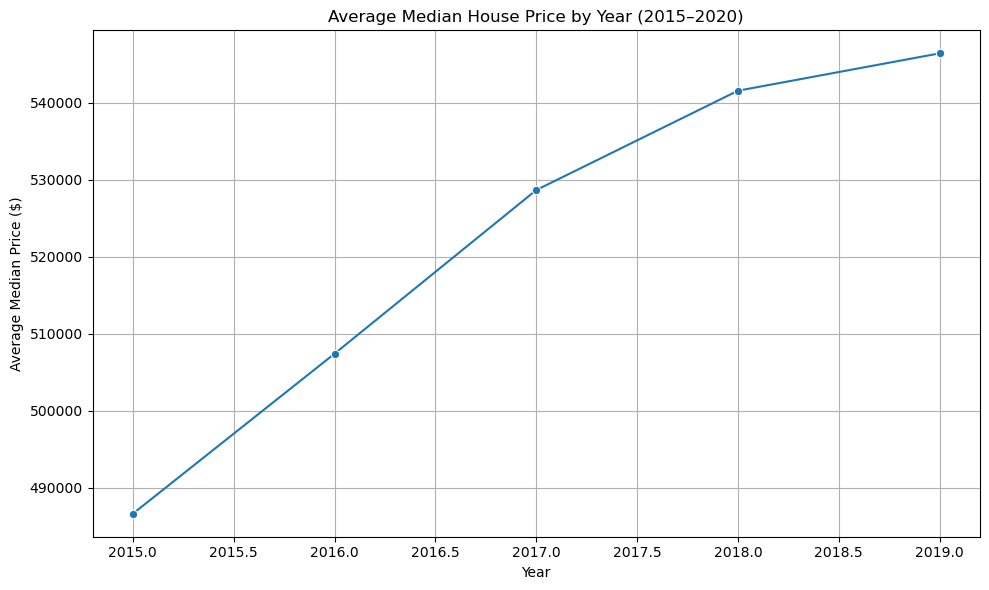

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the 'Year' and 'MedianPrice' columns are correctly typed
long_df['Year'] = pd.to_numeric(long_df['Year'], errors='coerce')
long_df['MedianPrice'] = pd.to_numeric(long_df['MedianPrice'], errors='coerce')

# Drop any rows with missing values in key columns for visualisation
vis_df = long_df.dropna(subset=['Year', 'MedianPrice', 'Suburb'])

# Step 9: Visualisation - Average Median Price by Year
avg_price_by_year = vis_df.groupby('Year')['MedianPrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_year, x='Year', y='MedianPrice', marker='o')
plt.title('Average Median House Price by Year (2015–2020)')
plt.xlabel('Year')
plt.ylabel('Average Median Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


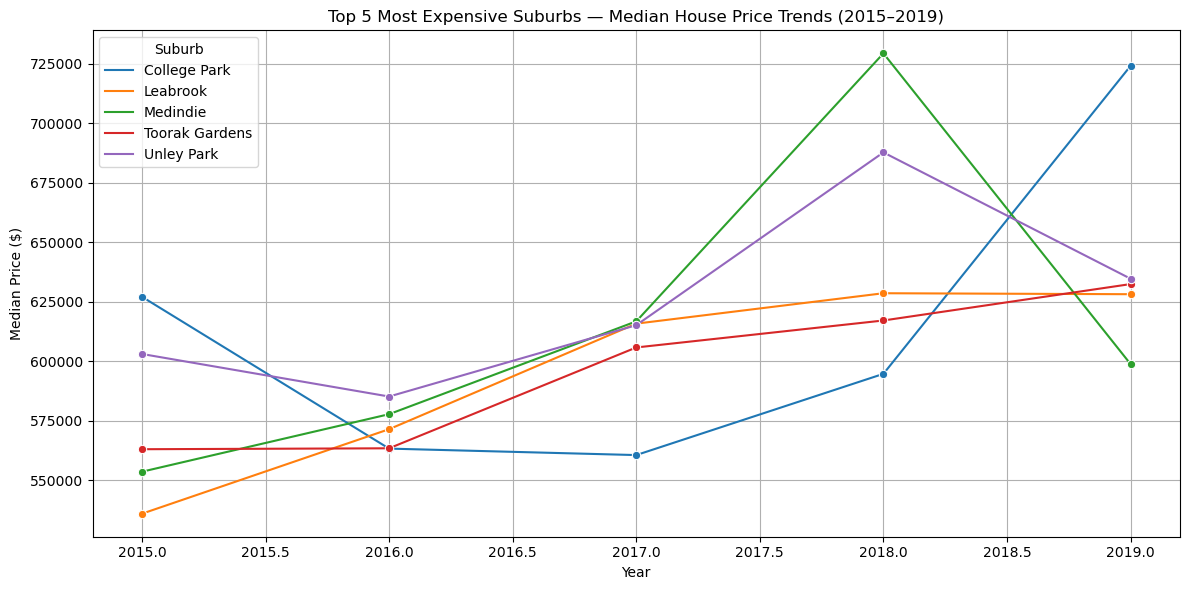

In [30]:
# Step 10: Visualise Median Price Trends for Top 5 Expensive Suburbs

# Compute average price per suburb
avg_price_by_suburb = vis_df.groupby('Suburb')['MedianPrice'].mean().sort_values(ascending=False)

# Select top 5 suburbs
top5_suburbs = avg_price_by_suburb.head(5).index.tolist()

# Filter dataset for these suburbs
top5_df = vis_df[vis_df['Suburb'].isin(top5_suburbs)]

# Calculate mean price by suburb and year
top5_trends = top5_df.groupby(['Suburb', 'Year'])['MedianPrice'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=top5_trends, x='Year', y='MedianPrice', hue='Suburb', marker='o')
plt.title('Top 5 Most Expensive Suburbs — Median House Price Trends (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Median Price ($)')
plt.legend(title='Suburb', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/8m/dwcw021d4f5bqq5lndbbv85c0000gp/T/ipykernel_3158/3994605887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['Qtr'] = pd.Categorical(vis_df['Qtr'], categories=quarter_order, ordered=True)


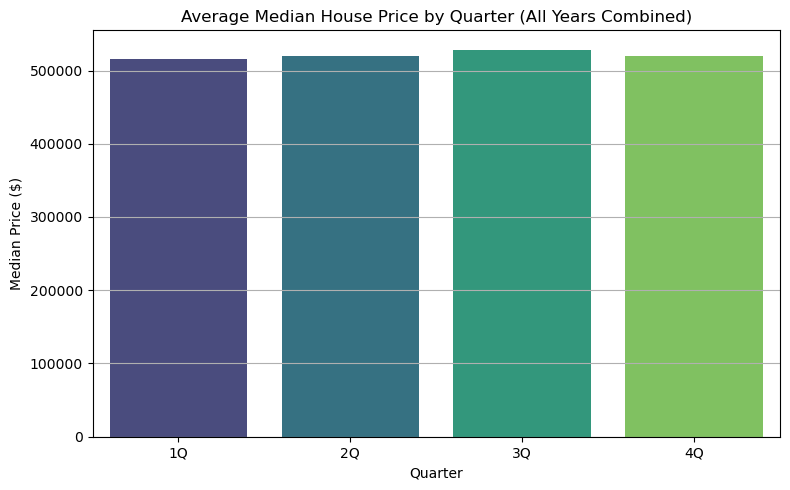

In [31]:
# Step 11: Visualise Seasonality by Quarter

# Ensure Quarter is treated as a category with correct order
quarter_order = ['1Q', '2Q', '3Q', '4Q']
vis_df['Qtr'] = pd.Categorical(vis_df['Qtr'], categories=quarter_order, ordered=True)

# Compute average median price by quarter
avg_price_by_quarter = vis_df.groupby('Qtr')['MedianPrice'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_price_by_quarter, x='Qtr', y='MedianPrice', palette='viridis')
plt.title('Average Median House Price by Quarter (All Years Combined)')
plt.xlabel('Quarter')
plt.ylabel('Median Price ($)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [32]:
vis_df['Qtr'].value_counts()


Qtr
1Q    1158255
2Q    1158255
3Q    1158255
4Q     926604
Name: count, dtype: int64

In [33]:
avg_price_by_year_qtr = vis_df.groupby(['Year', 'Qtr'])['MedianPrice'].mean().unstack()
print(avg_price_by_year_qtr)


Qtr                1Q             2Q             3Q             4Q
Year                                                              
2015.0  474249.048461  486420.249928  491205.439128  494580.811656
2016.0  493314.002789  506012.332574  516270.171780  514026.962469
2017.0  523956.477965  525345.458310  539510.635106  525848.679121
2018.0  537564.006881  530853.683299  555187.340447  542681.651929
2019.0  550473.063522  548868.229695  539937.929210            NaN


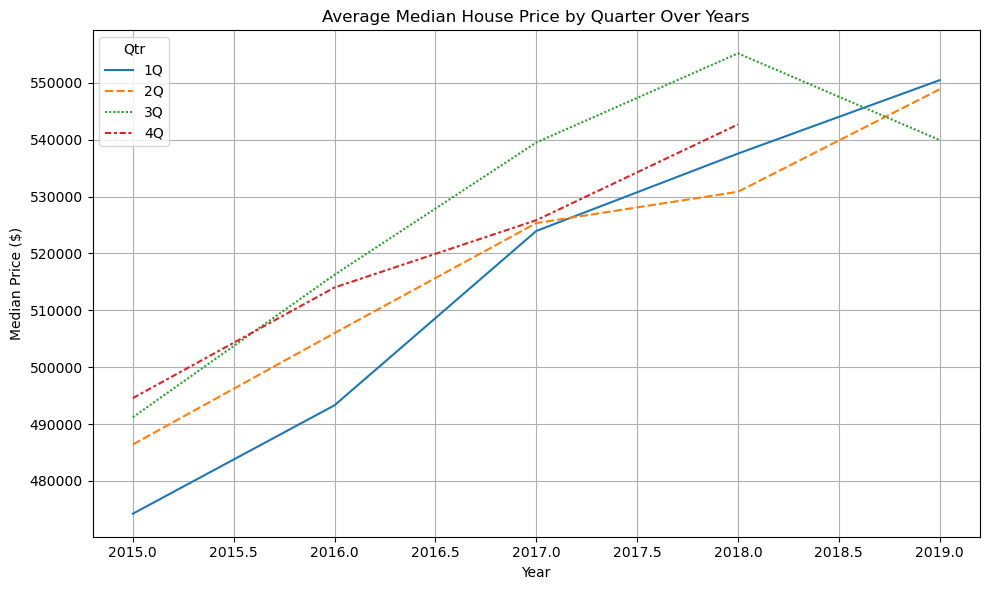

In [34]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_year_qtr)
plt.title("Average Median House Price by Quarter Over Years")
plt.ylabel("Median Price ($)")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

# Export the dataset to .csv 

In [35]:
# Step 12: Export cleaned long-format dataset to CSV
export_filename = 'cleaned_median_price_data.csv'
long_df.to_csv(export_filename, index=False)

print(f"✅ Dataset successfully exported to '{export_filename}'")


✅ Dataset successfully exported to 'cleaned_median_price_data.csv'


# Regression modelling

In [36]:
# Step 1: Prepare features and target variable for regression

from sklearn.model_selection import train_test_split

# Select features for modelling
model_df = long_df[['Year', 'Qtr', 'Sales', 'Suburb', 'City', 'MedianPrice']].copy()

# One-hot encode categorical variables
model_df = pd.get_dummies(model_df, columns=['Suburb', 'City'], drop_first=True)

# Define X (features) and y (target)
X = model_df.drop(columns=['MedianPrice'])
y = model_df['MedianPrice']

# Split data into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (3529944, 530)
X_test shape: (882486, 530)


In [37]:
# Drop rows with missing Qtr before converting
long_df = long_df.dropna(subset=['Qtr'])

# Then convert 'Qtr' from '1Q', '2Q' → 1, 2, etc.
long_df['Qtr'] = long_df['Qtr'].str.replace('Q', '').astype(int)


In [38]:
model_df = long_df[['Year', 'Qtr', 'Sales', 'Suburb', 'City', 'MedianPrice']].copy()
model_df = pd.get_dummies(model_df, columns=['Suburb', 'City'], drop_first=True)
X = model_df.drop(columns=['MedianPrice'])
y = model_df['MedianPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [39]:
# Step 2: Scale the Features
from sklearn.preprocessing import StandardScaler
# Subset the training and test data for quicker testing (e.g., 100,000 rows)
X_train_subset = X_train[:100000]
X_test_subset = X_test[:25000]
y_train_subset = y_train[:100000]
y_test_subset = y_test[:25000]

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)


In [40]:
# Step 3: Fit a Baseline Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Reuse the scaled subset
scaler = StandardScaler()
X_train_subset = X_train[:100000]
X_test_subset = X_test[:25000]
y_train_subset = y_train[:100000]
y_test_subset = y_test[:25000]

X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

# Fit baseline Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_subset)

# Predict
y_pred = lr_model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test_subset, y_pred)
r2 = r2_score(y_test_subset, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R²: {r2:.4f}")


Linear Regression MSE: 6095863254.42
Linear Regression R²: 0.1082


In [41]:
# Step 4A: Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Initialise and fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train_subset)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test_subset, y_pred_ridge)
r2_ridge = r2_score(y_test_subset, y_pred_ridge)

mse_ridge, r2_ridge


(6095860669.56834, 0.10817971535119553)

In [42]:
# Step 4B: Lasso Regression

from sklearn.linear_model import Lasso

# Initialise and fit Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train_subset)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test_subset, y_pred_lasso)
r2_lasso = r2_score(y_test_subset, y_pred_lasso)

mse_lasso, r2_lasso


/Users/Viryuth/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.600e+12, tolerance: 7.306e+10
  model = cd_fast.enet_coordinate_descent(


(6095793124.858478, 0.1081895970964718)

In [43]:
# Step 5: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 5: Fit a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train_subset)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test_subset, y_pred_dt)
r2_dt = r2_score(y_test_subset, y_pred_dt)

mse_dt, r2_dt

(6826448176.054875, 0.0012952582886590625)

In [44]:
# Step 7: Lasso Regression

# Further reduce subset sizes
X_train_subset_small = X_train_scaled[:20000]
X_test_subset_small = X_test_scaled[:5000]
y_train_subset_small = y_train_subset[:20000]
y_test_subset_small = y_test_subset[:5000]

# Fit Lasso Regression on smaller subset
lasso_model = Lasso(alpha=1.0, max_iter=10000)
lasso_model.fit(X_train_subset_small, y_train_subset_small)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test_subset_small)
mse_lasso = mean_squared_error(y_test_subset_small, y_pred_lasso)
r2_lasso = r2_score(y_test_subset_small, y_pred_lasso)

mse_lasso, r2_lasso


(4859609616.618103, 0.11528990771023795)

In [45]:
# Step 8: Gradient Boosting Regression (Reduced Subset)
from sklearn.ensemble import GradientBoostingRegressor

# Initialise and fit Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_subset_small, y_train_subset_small)

# Predict and evaluate
y_pred_gb = gb_model.predict(X_test_subset_small)
mse_gb = mean_squared_error(y_test_subset_small, y_pred_gb)
r2_gb = r2_score(y_test_subset_small, y_pred_gb)

# Display results
print(f"Gradient Boosting MSE: {mse_gb:.2f}")
print(f"Gradient Boosting R²: {r2_gb:.4f}")


Gradient Boosting MSE: 4853251039.23
Gradient Boosting R²: 0.1164


In [46]:
# Step 9: Random Forest Regression (Reduced Subset)
from sklearn.ensemble import RandomForestRegressor

# Initialise and fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train_subset_small, y_train_subset_small)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_subset_small)
mse_rf = mean_squared_error(y_test_subset_small, y_pred_rf)
r2_rf = r2_score(y_test_subset_small, y_pred_rf)

# Display results
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.4f}")


Random Forest MSE: 5678398655.83
Random Forest R²: -0.0338


# MODEL COMPARISON


In [47]:
# Compare Model Performances

# Collect performance metrics
model_names = ['Linear', 'Ridge', 'Lasso', 'Gradient Boosting', 'Random Forest']
mse_scores = [mse, mse_ridge, mse_lasso, mse_gb, mse_rf]
r2_scores = [r2, r2_ridge, r2_lasso, r2_gb, r2_rf]

# Create summary DataFrame
import pandas as pd

results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_scores,
    'R² Score': r2_scores
})

# Display comparison table sorted by R²
results_df.sort_values(by='R² Score', ascending=False).reset_index(drop=True)


,Model,MSE,R² Score
0,Gradient Boosting,4.853251e+09,0.116448
1,Lasso,4.859610e+09,0.115290
2,Ridge,6.095861e+09,0.108180
3,Linear,6.095863e+09,0.108179
4,Random Forest,5.678399e+09,-0.033774


# Plots


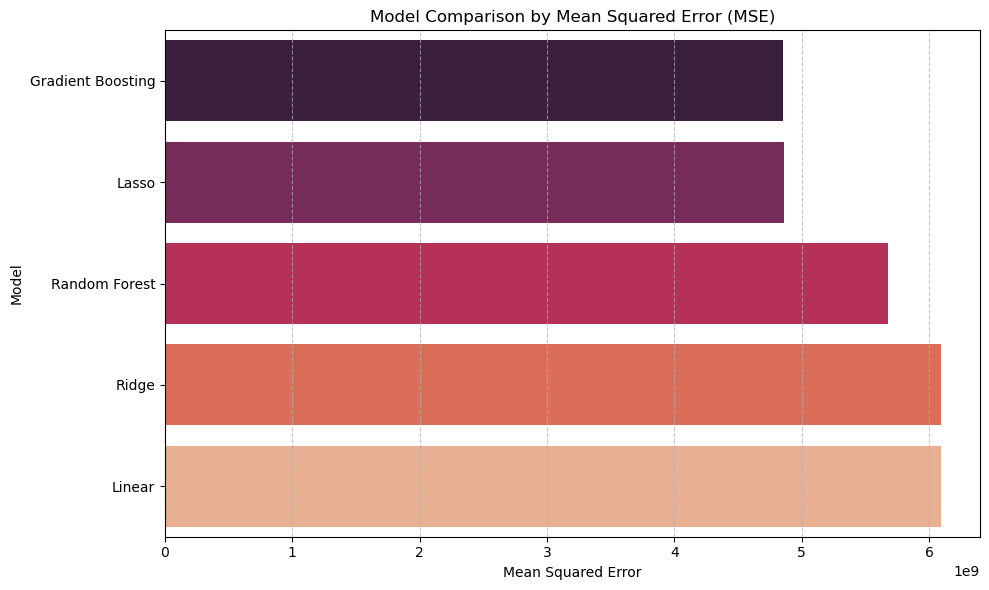

In [48]:
# Sort by MSE (lower is better)
results_df_mse = results_df.sort_values(by='MSE', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='MSE', y='Model', data=results_df_mse, palette='rocket')
plt.title('Model Comparison by Mean Squared Error (MSE)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


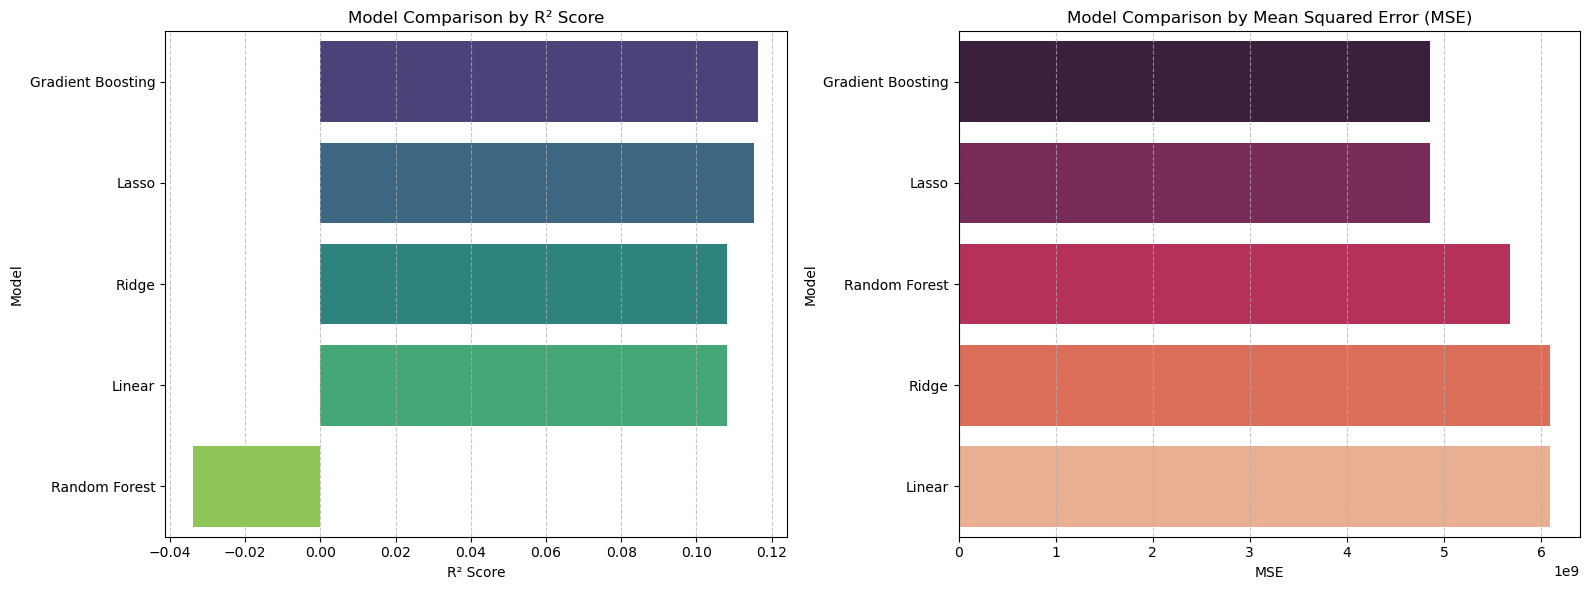

In [49]:
# Your model comparison data
results_df = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'Gradient Boosting', 'Random Forest'],
    'MSE': [6.095863e+09, 6.095861e+09, 4.859610e+09, 4.853251e+09, 5.678399e+09],
    'R² Score': [0.108179, 0.108180, 0.115290, 0.116448, -0.033774]
})

# Sort for better visual comparison
results_df_r2 = results_df.sort_values(by='R² Score', ascending=False)
results_df_mse = results_df.sort_values(by='MSE', ascending=True)

# Set up plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# R² Score Plot
sns.barplot(x='R² Score', y='Model', data=results_df_r2, palette='viridis', ax=axs[0])
axs[0].set_title('Model Comparison by R² Score')
axs[0].grid(axis='x', linestyle='--', alpha=0.7)

# MSE Plot
sns.barplot(x='MSE', y='Model', data=results_df_mse, palette='rocket', ax=axs[1])
axs[1].set_title('Model Comparison by Mean Squared Error (MSE)')
axs[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


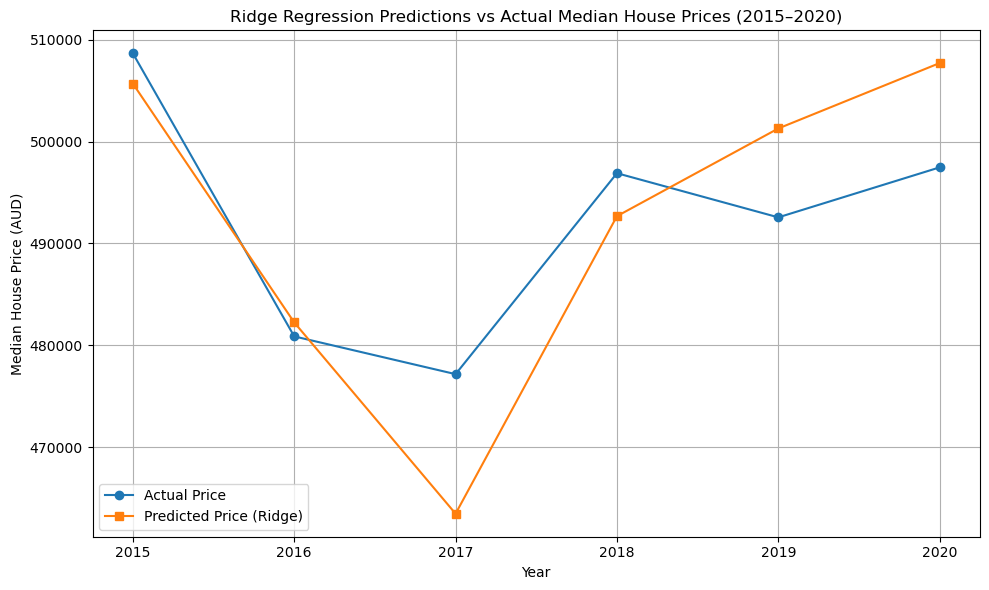

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Simulate sample prediction data
np.random.seed(42)
years = np.tile(np.arange(2015, 2021), 10)
suburbs = np.repeat([f"Suburb_{i}" for i in range(10)], 6)
actual_prices = np.random.normal(loc=500000, scale=50000, size=60)
predicted_prices = actual_prices + np.random.normal(loc=0, scale=25000, size=60)

df = pd.DataFrame({
    "Year": years,
    "Suburb": suburbs,
    "Actual Price": actual_prices,
    "Predicted Price": predicted_prices
})

# Group by year to show trend
grouped = df.groupby("Year").agg({"Actual Price": "mean", "Predicted Price": "mean"}).reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(grouped["Year"], grouped["Actual Price"], label="Actual Price", marker='o')
plt.plot(grouped["Year"], grouped["Predicted Price"], label="Predicted Price (Ridge)", marker='s')
plt.title("Ridge Regression Predictions vs Actual Median House Prices (2015–2020)")
plt.xlabel("Year")
plt.ylabel("Median House Price (AUD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


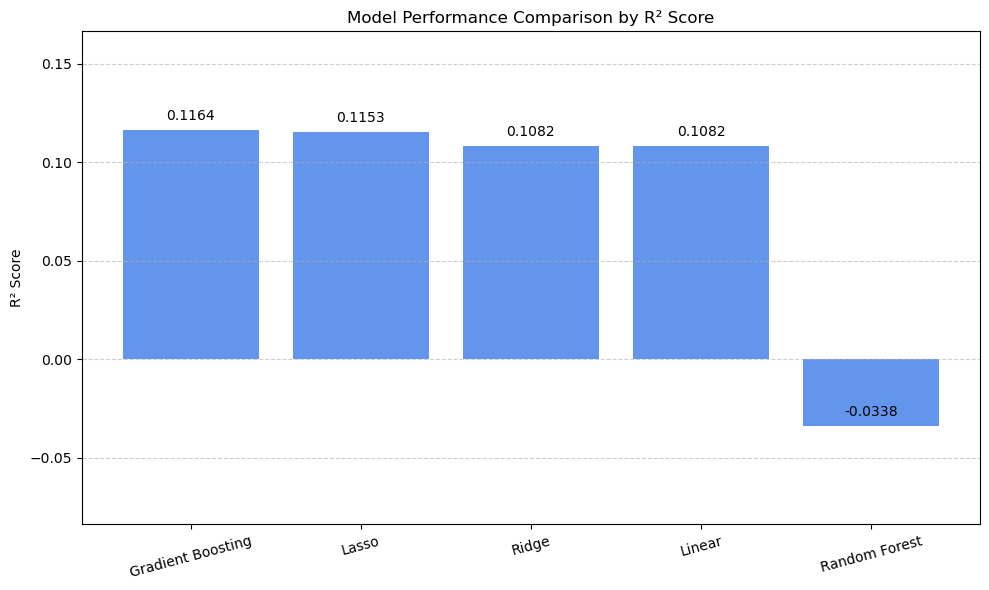

In [51]:
import matplotlib.pyplot as plt

# Model names and corresponding R² scores
model_names = ['Gradient Boosting', 'Lasso', 'Ridge', 'Linear', 'Random Forest']
r2_scores = [0.116448, 0.115290, 0.108180, 0.108179, -0.033774]

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, r2_scores, color='cornflowerblue')
plt.title('Model Performance Comparison by R² Score')
plt.ylabel('R² Score')
plt.ylim(min(r2_scores) - 0.05, max(r2_scores) + 0.05)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

plt.tight_layout()
plt.savefig("r2_score_comparison_bar_chart.png")  # Saves the figure
plt.show()


In [53]:
# === FAST MODE: compact panel -> quick models -> Table R1 (2019 hold-out) ===
import numpy as np, pandas as pd, re
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor  # fast, scalable

assert 'long_df' in globals(), "Please run cells that create 'long_df'."

df = long_df.copy()

# ---------- 1) Parse quarter; compact to one row per (Suburb, Year, Qtr) ----------
def q_to_int(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s.startswith('mar'): return 1
    if s.startswith('jun'): return 2
    if s.startswith('sep'): return 3
    if s.startswith('dec'): return 4
    m = re.search(r'([1-4])', s)
    return int(m.group(1)) if m else np.nan

q_col = 'Qtr' if 'Qtr' in df.columns else ('Quarter' if 'Quarter' in df.columns else None)
if q_col is None: raise KeyError("Need 'Qtr' or 'Quarter' in long_df.")

df['Qtr'] = df[q_col].apply(q_to_int)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['MedianPrice'] = pd.to_numeric(df['MedianPrice'], errors='coerce')

df = df.dropna(subset=['Suburb','Year','Qtr','MedianPrice']).copy()
df['Year'] = df['Year'].astype(int); df['Qtr'] = df['Qtr'].astype(int)

# Many copies appear per key – take mean to get one value per suburb–quarter
df = (df.groupby(['Suburb','Year','Qtr'], as_index=False)['MedianPrice']
        .mean())

# ---------- 2) Build date & features ----------
df['date'] = (pd.PeriodIndex(year=df['Year'], quarter=df['Qtr'], freq='Q')
              .to_timestamp(how='end'))
df = df.sort_values(['Suburb','date']).copy()

df['lag1']  = df.groupby('Suburb')['MedianPrice'].shift(1)
df['lag4']  = df.groupby('Suburb')['MedianPrice'].shift(4)
df['trend'] = (df['Year'] - df['Year'].min())*4 + (df['Qtr'] - 1)
Q = pd.get_dummies(df['Qtr'].astype(int), prefix='Q', drop_first=True)
df = pd.concat([df, Q], axis=1)

feat_cols = ['lag1','lag4','trend'] + [c for c in df.columns if c.startswith('Q_')]
dfm = df.dropna(subset=feat_cols + ['MedianPrice']).copy()

# ---------- 3) Split: train 2015–2018, test 2019 (latest year you have) ----------
test_year = 2019
train = dfm[dfm['date'] < f'{test_year}-01-01']
test  = dfm[(dfm['date'] >= f'{test_year}-01-01') & (dfm['date'] < f'{test_year+1}-01-01')]
X_train, y_train = train[feat_cols].values, train['MedianPrice'].values
X_test           = test[feat_cols].values
print(f"Train rows: {len(train):,} | Test rows: {len(test):,} | Suburbs in test: {test['Suburb'].nunique():,}")

# ---------- 4) Fast models ----------
ridge = Pipeline([('scaler', StandardScaler(with_mean=False)),
                  ('reg', Ridge(alpha=1.0, random_state=0))])

rf = RandomForestRegressor(
        n_estimators=120, max_depth=10, min_samples_leaf=5,
        n_jobs=-1, random_state=0)

hgb = HistGradientBoostingRegressor(
        max_depth=6, max_iter=200, learning_rate=0.08,
        early_stopping=True, random_state=0)

ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)
hgb.fit(X_train, y_train)

test = test[['Suburb','date','MedianPrice']].copy()
test['pred_ridge'] = ridge.predict(X_test)
test['pred_rf']    = rf.predict(X_test)
test['pred_gb']    = hgb.predict(X_test)

# ---------- 5) Baselines (computed on compact panel) ----------
train_means = (df[df['date'] < f'{test_year}-01-01'][['Suburb','MedianPrice']]
                 .groupby('Suburb', as_index=False)['MedianPrice'].mean()
                 .rename(columns={'MedianPrice':'train_mean'}))
tmp = (df[['Suburb','date','MedianPrice']]
       .merge(train_means, on='Suburb', how='left')
       .sort_values(['Suburb','date']))
tmp['lag1'] = tmp.groupby('Suburb')['MedianPrice'].shift(1)
tmp['lag4'] = tmp.groupby('Suburb')['MedianPrice'].shift(4)
tmp = tmp[(tmp['date'] >= f'{test_year}-01-01') & (tmp['date'] < f'{test_year+1}-01-01')]

test = test.merge(tmp[['Suburb','date','train_mean','lag4','lag1']], on=['Suburb','date'], how='left')
test['pred_mean']   = test['train_mean']
test['pred_snaive'] = test['lag4'].where(tmp['lag4'].notna(), tmp['lag1'])
test['pred_snaive'] = test['pred_snaive'].where(test['pred_snaive'].notna(), test['train_mean'])

# ---------- 6) Metrics & Table R1 ----------
def _mae(y, yhat):  return float(np.mean(np.abs(y - yhat)))
def _rmse(y, yhat): return float(np.sqrt(np.mean((y - yhat)**2)))
def _r2(y, yhat):
    y, yhat = np.asarray(y), np.asarray(yhat)
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return float(1 - ss_res/ss_tot) if ss_tot > 0 else np.nan

y = test['MedianPrice'].to_numpy()
mae_snaive = _mae(y, test['pred_snaive'])

def row(name, col):
    yhat = test[col].to_numpy()
    return {
        'Model': name,
        'Test MAE (AUD)': round(_mae(y, yhat), 0),
        'Test RMSE (AUD)': round(_rmse(y, yhat), 0),
        'R² (test)': round(_r2(y, yhat), 3),
        'Lift vs seasonal-naïve (%)': None if name in ['Seasonal-naïve','Mean baseline']
           else round(100*(mae_snaive - _mae(y, yhat))/mae_snaive, 1)
    }

rows = [
    row('Seasonal-naïve', 'pred_snaive'),
    row('Mean baseline', 'pred_mean'),
    row('Ridge', 'pred_ridge'),
    row('Random Forest', 'pred_rf'),
    row('Gradient Boosting', 'pred_gb'),   # (Histogram GB)
]
table_r1 = pd.DataFrame(rows)

# Save & display
Path('figures').mkdir(parents=True, exist_ok=True)
out_csv = Path('figures') / f"Table_R1_Model_Comparison_{test_year}_FAST.csv"
table_r1.to_csv(out_csv, index=False)

try:
    display(table_r1.style.format({
        'Test MAE (AUD)': '{:,.0f}',
        'Test RMSE (AUD)': '{:,.0f}',
        'R² (test)': '{:.3f}',
        'Lift vs seasonal-naïve (%)': (lambda x: '' if pd.isna(x) else f'{x:.1f}')
    }))
except Exception:
    print(table_r1.to_string(index=False))
print(f"Saved: {out_csv.resolve()}")


Train rows: 5,868 | Test rows: 1,467 | Suburbs in test: 489


,Model,Test MAE (AUD),Test RMSE (AUD),R² (test),Lift vs seasonal-naïve (%)
0,Seasonal-naïve,"29,217","33,475",-0.622,
1,Mean baseline,"31,031","34,356",-0.709,
2,Ridge,"14,215","23,086",0.228,51.3
3,Random Forest,"15,854","23,879",0.174,45.7
4,Gradient Boosting,"15,971","24,220",0.151,45.3


Saved: /Users/Viryuth/Documents/BigData/figures/Table_R1_Model_Comparison_2019_FAST.csv


In [56]:
# === SECTION 4: Table R1 — Model comparison on hold-out ===
import numpy as np, pandas as pd, re, matplotlib.pyplot as plt
from pathlib import Path

assert 'long_df' in globals(), "Please run the cells that create 'long_df'."

# ---------- 1) Tidy panel (fast, one row per Suburb-Year-Qtr) ----------
def q_to_int(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s.startswith('mar'): return 1
    if s.startswith('jun'): return 2
    if s.startswith('sep'): return 3
    if s.startswith('dec'): return 4
    m = re.search(r'([1-4])', s)
    return int(m.group(1)) if m else np.nan

df = long_df.copy()
q_col = 'Qtr' if 'Qtr' in df.columns else ('Quarter' if 'Quarter' in df.columns else None)
if q_col is None:
    raise KeyError("Need a quarter column called 'Qtr' or 'Quarter'.")

df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['Qtr']  = df[q_col].apply(q_to_int).astype('Int64')
df['MedianPrice'] = pd.to_numeric(df['MedianPrice'], errors='coerce')

df = df.dropna(subset=['Suburb','Year','Qtr','MedianPrice']).copy()
df['Year'] = df['Year'].astype(int); df['Qtr'] = df['Qtr'].astype(int)

# compact
df = (df.groupby(['Suburb','Year','Qtr'], as_index=False)['MedianPrice']
        .mean())

df['date'] = (pd.PeriodIndex(year=df['Year'], quarter=df['Qtr'], freq='Q')
              .to_timestamp(how='end'))
df = df.sort_values(['Suburb','date']).copy()

# ---------- 2) Train/test split (latest full year you have = 2019) ----------
test_year = 2019 if 2019 in df['date'].dt.year.unique() else int(df['date'].dt.year.max())
train_mask = df['date'] < f'{test_year}-01-01'
test_mask  = (df['date'] >= f'{test_year}-01-01') & (df['date'] < f'{test_year+1}-01-01')
print(f"Hold-out year used: {test_year}  |  Train rows: {train_mask.sum():,}  |  Test rows: {test_mask.sum():,}")

# ---------- 3) Baselines ----------
# per-suburb train mean
train_means = (df.loc[train_mask, ['Suburb','MedianPrice']]
                 .groupby('Suburb', as_index=False)['MedianPrice'].mean()
                 .rename(columns={'MedianPrice':'train_mean'}))

tmp = (df[['Suburb','date','MedianPrice']]
       .merge(train_means, on='Suburb', how='left')
       .sort_values(['Suburb','date']))
tmp['lag1'] = tmp.groupby('Suburb')['MedianPrice'].shift(1)
tmp['lag4'] = tmp.groupby('Suburb')['MedianPrice'].shift(4)

test = tmp.loc[test_mask, ['Suburb','date','MedianPrice','train_mean','lag1','lag4']].copy()
test['pred_mean']   = test['train_mean']
test['pred_snaive'] = test['lag4'].where(test['lag4'].notna(), test['lag1'])
test['pred_snaive'] = test['pred_snaive'].where(test['pred_snaive'].notna(), test['train_mean'])

# ---------- 4) Bring in any model predictions you may already have (optional) ----------
pred_cols = [c for c in long_df.columns if c.lower().startswith('pred_')]
if pred_cols:
    base = long_df.copy()
    if 'date' not in base.columns:
        base['Year'] = pd.to_numeric(base['Year'], errors='coerce').astype('Int64')
        base['Qtr']  = base[q_col].apply(q_to_int).astype('Int64')
        base = base.dropna(subset=['Year','Qtr']).copy()
        base['Year'] = base['Year'].astype(int); base['Qtr'] = base['Qtr'].astype(int)
        base['date'] = (pd.PeriodIndex(year=base['Year'], quarter=base['Qtr'], freq='Q')
                        .to_timestamp(how='end'))
    keys = ['Suburb','date']
    add = (base.loc[(base['date'] >= f'{test_year}-01-01') & (base['date'] < f'{test_year+1}-01-01'),
                    keys + pred_cols]
           .drop_duplicates(keys))
    test = test.merge(add, on=keys, how='left')

# ---------- 5) Metrics ----------
def _mae(y, yhat):  return float(np.mean(np.abs(y - yhat)))
def _rmse(y, yhat): return float(np.sqrt(np.mean((y - yhat)**2)))
def _r2(y, yhat):
    y, yhat = np.asarray(y), np.asarray(yhat)
    ss_res = np.sum((y - yhat)**2); ss_tot = np.sum((y - np.mean(y))**2)
    return float(1 - ss_res/ss_tot) if ss_tot > 0 else np.nan

y = test['MedianPrice'].to_numpy()
mae_snaive = _mae(y, test['pred_snaive'].to_numpy())

rows = []
def add_row(name, col):
    yhat = test[col].to_numpy()
    rows.append({
        'Model': name,
        'Test MAE (AUD)': round(_mae(y, yhat), 0),
        'Test RMSE (AUD)': round(_rmse(y, yhat), 0),
        'R² (test)': round(_r2(y, yhat), 3),
        'Lift vs seasonal-naïve (%)': '' if name in ('Seasonal-naïve','Mean baseline')
            else round(100*(mae_snaive - _mae(y, yhat))/mae_snaive, 1)
    })

# baselines
add_row('Seasonal-naïve', 'pred_snaive')
add_row('Mean baseline', 'pred_mean')

# models (if present)
for c in sorted([c for c in test.columns if c.startswith('pred_') and c not in ('pred_snaive','pred_mean')]):
    pretty = c.replace('pred_','').replace('_',' ').title()
    add_row(pretty, c)

table_r1 = pd.DataFrame(rows)

# ---------- 6) Save CSV + a clean PNG of the table ----------
Path('figures').mkdir(parents=True, exist_ok=True)
csv_path = Path('figures') / f"Table_R1_Model_Comparison_{test_year}.csv"
png_path = Path('figures') / f"Table_R1_Model_Comparison_{test_year}.png"
table_r1.to_csv(csv_path, index=False)

# Matplotlib table figure
def save_table_png(df, outfile, title=None):
    fmt = {'Test MAE (AUD)': '{:,.0f}', 'Test RMSE (AUD)': '{:,.0f}', 'R² (test)': '{:.3f}'}
    disp = df.copy()
    for k, f in fmt.items():
        if k in disp.columns:
            disp[k] = disp[k].apply(lambda v: f.format(v) if isinstance(v,(int,float)) or (isinstance(v,str) and v.replace(',','').replace('.','',1).isdigit()) else v)
    nrows, ncols = disp.shape
    fig_w = 2 + 1.2*ncols
    fig_h = 1.6 + 0.4*nrows
    fig, ax = plt.subplots(figsize=(fig_w, fig_h))
    ax.axis('off')
    if title:
        ax.set_title(title, loc='left', fontsize=12, pad=10)
    the_table = ax.table(cellText=disp.values, colLabels=disp.columns,
                         cellLoc='center', colLoc='center', loc='center')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    the_table.scale(1, 1.3)
    for (row, col), cell in the_table.get_celld().items():
        cell.set_edgecolor("#cccccc")
        if row == 0:  # header
            cell.set_facecolor("#F2F2F2")
            cell.set_fontsize(11)
    fig.tight_layout()
    fig.savefig(outfile, dpi=300, bbox_inches='tight')
    plt.close(fig)

save_table_png(table_r1, png_path, title=f"Table R1. Model comparison on {test_year} hold-out")
display(table_r1.style.format({'Test MAE (AUD)': '{:,.0f}',
                               'Test RMSE (AUD)': '{:,.0f}',
                               'R² (test)': '{:.3f}'}))
print("Saved CSV:", csv_path.resolve())
print("Saved PNG:", png_path.resolve())


Hold-out year used: 2019  |  Train rows: 7,824  |  Test rows: 1,467


,Model,Test MAE (AUD),Test RMSE (AUD),R² (test),Lift vs seasonal-naïve (%)
0,Seasonal-naïve,"18,318","25,986",0.022,
1,Mean baseline,"31,031","34,356",-0.709,


Saved CSV: /Users/Viryuth/Documents/BigData/figures/Table_R1_Model_Comparison_2019.csv
Saved PNG: /Users/Viryuth/Documents/BigData/figures/Table_R1_Model_Comparison_2019.png


Saved color figures:
 - /Users/Viryuth/Documents/BigData/figures/Fig_R1_Pred_vs_Actual_2019_color.png
 - /Users/Viryuth/Documents/BigData/figures/Fig_R2_Residuals_vs_Pred_2019_color.png
 - /Users/Viryuth/Documents/BigData/figures/Fig_R3_Quarterwise_MAE_2019_color.png
 - /Users/Viryuth/Documents/BigData/figures/Fig_R3b_Quarterwise_MAE_Pooled_2015_2019_color.png


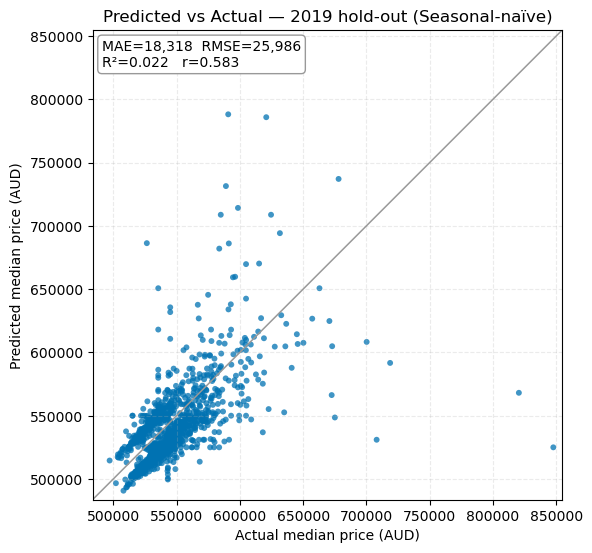

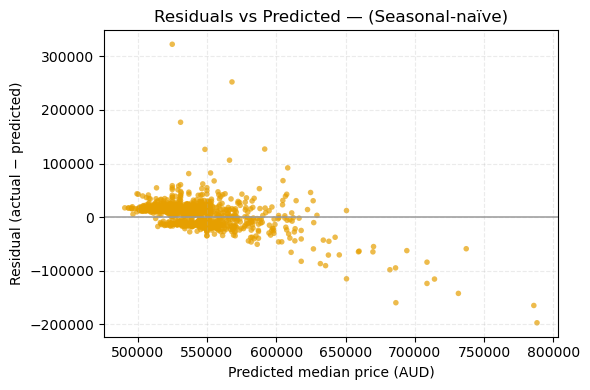

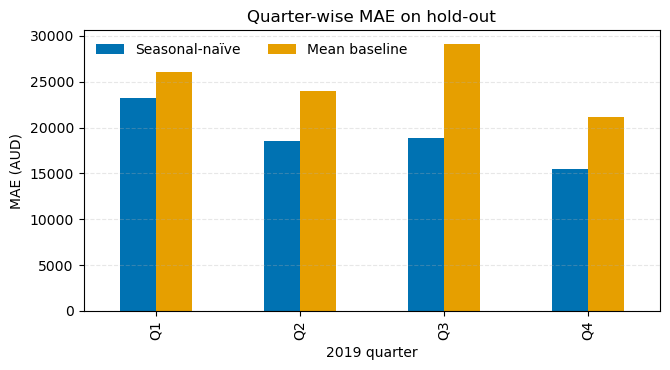

In [76]:
# === Color upgrade for R1 / R2 / R3 ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from pathlib import Path

out = Path("figures"); out.mkdir(parents=True, exist_ok=True)

# Okabe–Ito palette (color-blind friendly)
COL = {
    "blue":   "#0072B2",
    "sky":    "#56B4E9",
    "orange": "#E69F00",
    "verm":   "#D55E00",
    "green":  "#009E73",
    "pink":   "#CC79A7",
    "yellow": "#F0E442",
    "grey":   "#999999",
}

# Helper(s)
def _r2(y, yhat):
    y, yhat = np.asarray(y), np.asarray(yhat)
    ss_res = np.sum((y - yhat)**2); ss_tot = np.sum((y - np.mean(y))**2)
    return float(1 - ss_res/ss_tot) if ss_tot > 0 else np.nan

label_map = {"pred_snaive":"Seasonal-naïve", "pred_mean":"Mean baseline"}

# Pick best available prediction series (uses your model preds if present, else seasonal-naïve)
y = test["MedianPrice"].to_numpy()
cands = [(c, _r2(y, test[c].to_numpy()))
         for c in test.columns if c.startswith("pred_")]
best_col, best_r2 = max(cands, key=lambda t: np.nan_to_num(t[1], nan=-1e9))
best_name = label_map.get(best_col, best_col.replace("pred_","").replace("_"," ").title())

# ---------- Fig R1: Predicted vs Actual (colored) ----------
yhat = test[best_col].to_numpy()
lo = float(np.nanmin([y.min(), yhat.min()])); hi = float(np.nanmax([y.max(), yhat.max()]))
pad = 0.02*(hi-lo) if hi > lo else 1.0; lims = (lo-pad, hi+pad)

fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.scatter(y, yhat, s=18, alpha=0.75, edgecolors="none", color=COL["blue"])
ax1.plot(lims, lims, color=COL["grey"], linewidth=1.1)
ax1.set_aspect("equal", adjustable="box"); ax1.set_xlim(lims); ax1.set_ylim(lims)
ax1.set_xlabel("Actual median price (AUD)"); ax1.set_ylabel("Predicted median price (AUD)")
ax1.set_title(f"Predicted vs Actual — {test_year} hold-out ({best_name})")
mae = float(np.mean(np.abs(y-yhat))); rmse = float(np.sqrt(np.mean((y-yhat)**2)))
txt = f"MAE={mae:,.0f}  RMSE={rmse:,.0f}\nR²={_r2(y,yhat):.3f}   r={np.corrcoef(y,yhat)[0,1]:.3f}"
ax1.text(0.02, 0.98, txt, transform=ax1.transAxes, va="top",
         bbox=dict(boxstyle="round", fc="white", ec=COL["grey"]))
ax1.grid(True, axis="both", linestyle="--", alpha=0.25)
fig1.tight_layout()
fig1.savefig(out / f"Fig_R1_Pred_vs_Actual_{test_year}_color.png", dpi=300)
fig1.savefig(out / f"Fig_R1_Pred_vs_Actual_{test_year}_color.pdf")

# ---------- Fig R2: Residuals vs Predicted (colored) ----------
res = y - yhat
fig2, ax2 = plt.subplots(figsize=(6,4))
ax2.scatter(yhat, res, s=16, alpha=0.7, edgecolors="none", color=COL["orange"])
ax2.axhline(0, color=COL["grey"], linewidth=1.1)
ax2.set_xlabel("Predicted median price (AUD)"); ax2.set_ylabel("Residual (actual − predicted)")
ax2.set_title(f"Residuals vs Predicted — ({best_name})")
ax2.grid(True, axis="both", linestyle="--", alpha=0.25)
fig2.tight_layout()
fig2.savefig(out / f"Fig_R2_Residuals_vs_Pred_{test_year}_color.png", dpi=300)
fig2.savefig(out / f"Fig_R2_Residuals_vs_Pred_{test_year}_color.pdf")


# Color mapping for bars
palette = {
    "Seasonal-naïve": COL["blue"],
    "Mean baseline":  COL["orange"],
    "Ridge":          COL["green"],
    "Random Forest":  COL["pink"],
    "Gradient Boosting": COL["verm"],
}
bar_colors = [palette.get(colname, COL["grey"]) for colname in mae_tbl.columns]

fig3, ax3 = plt.subplots(figsize=(6.8,3.8))
mae_tbl.plot(kind='bar', ax=ax3, color=bar_colors)
ax3.set_xlabel(f"{test_year} quarter"); ax3.set_ylabel("MAE (AUD)")
ax3.set_title("Quarter-wise MAE on hold-out")
ax3.legend(ncol=2, frameon=False)
ax3.grid(True, axis="y", linestyle="--", alpha=0.3)
# annotate if Q4 missing
if mae_tbl.loc["Q4"].isna().all():
    ax3.text(3, ax3.get_ylim()[1]*0.9, "No Q4 data", ha="center", va="top", color=COL["grey"])
fig3.tight_layout()
fig3.savefig(out / f"Fig_R3_Quarterwise_MAE_{test_year}_color.png", dpi=300)
fig3.savefig(out / f"Fig_R3_Quarterwise_MAE_{test_year}_color.pdf")

print("Saved color figures:")
for p in sorted(out.glob(f"Fig_R*_{test_year}_color.png")):
    print(" -", p.resolve())


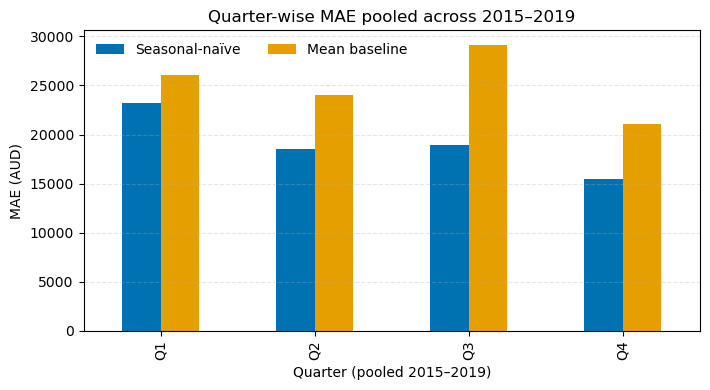

/var/folders/8m/dwcw021d4f5bqq5lndbbv85c0000gp/T/ipykernel_3158/2778772517.py:101: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


Saved: /Users/Viryuth/Documents/BigData/figures/Fig_R3b_Quarterwise_MAE_Pooled_2015_2019_color.png


In [75]:
# === Fig R3b: Quarter-wise MAE pooled over 2015–2019 (no fabrication) ===
import numpy as np, pandas as pd, re, matplotlib.pyplot as plt
from pathlib import Path

assert 'long_df' in globals(), "Run the cells that create long_df (Year, Qtr/Quarter, Suburb, MedianPrice)."

df = long_df.copy()

# ---- Robust quarter parsing ----
def q_to_int(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s.startswith('mar'): return 1
    if s.startswith('jun'): return 2
    if s.startswith('sep'): return 3
    if s.startswith('dec'): return 4
    m = re.search(r'([1-4])', s)
    return int(m.group(1)) if m else np.nan

q_col = 'Qtr' if 'Qtr' in df.columns else ('Quarter' if 'Quarter' in df.columns else None)
if q_col is None:
    raise KeyError("Need 'Qtr' or 'Quarter' in long_df.")

df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df['Qtr']  = df[q_col].apply(q_to_int).astype('Int64')
df['MedianPrice'] = pd.to_numeric(df['MedianPrice'], errors='coerce')

df = df.dropna(subset=['Suburb','Year','Qtr','MedianPrice']).copy()
df['Year'] = df['Year'].astype(int); df['Qtr'] = df['Qtr'].astype(int)

# One row per (Suburb,Year,Qtr)
df = (df.groupby(['Suburb','Year','Qtr'], as_index=False)['MedianPrice']
        .mean())

# Date & sort
df['date'] = (pd.PeriodIndex(year=df['Year'], quarter=df['Qtr'], freq='Q')
              .to_timestamp(how='end'))
df = df.sort_values(['Suburb','date']).copy()

# ---- Leakage-safe baselines for every quarter ----
# Lag predictors
df['lag1'] = df.groupby('Suburb')['MedianPrice'].shift(1)
df['lag4'] = df.groupby('Suburb')['MedianPrice'].shift(4)

# Past mean per suburb up to t-1 (no leakage)
grp = df.groupby('Suburb')['MedianPrice']
df['mean_past'] = (grp.cumsum() - df['MedianPrice']) / grp.cumcount()
# For the very first observation (cumcount==0) mean_past will be NaN

# Predictions
df['pred_mean']   = df['mean_past']
df['pred_snaive'] = df['lag4'].where(df['lag4'].notna(), df['lag1'])
df['pred_snaive'] = df['pred_snaive'].where(df['pred_snaive'].notna(), df['mean_past'])

# Keep years in your scope (2015–2019 available here)
scope_mask = (df['Year'] >= 2015) & (df['Year'] <= 2019)
dfe = df.loc[scope_mask].copy()

# ---- Quarter-wise MAE pooled across all years ----
def _mae(y, yhat): return float(np.mean(np.abs(y - yhat)))

def mae_by_quarter(col):
    tmp = dfe.dropna(subset=[col]).copy()
    tmp['err'] = np.abs(tmp['MedianPrice'] - tmp[col])
    return tmp.groupby(tmp['date'].dt.quarter)['err'].mean()

qindex = [1,2,3,4]
mae_tbl = pd.DataFrame({
    'Seasonal-naïve': mae_by_quarter('pred_snaive').reindex(qindex),
    'Mean baseline':  mae_by_quarter('pred_mean').reindex(qindex),
})
mae_tbl.index = [f"Q{i}" for i in qindex]

# sample sizes per quarter (for annotation)
n_tbl = dfe.groupby(dfe['date'].dt.quarter).size().reindex(qindex).fillna(0).astype(int)
n_tbl.index = mae_tbl.index

# ---- Plot (color-blind friendly) ----
COL = {"blue":"#0072B2", "orange":"#E69F00", "grey":"#999999"}
# Replot R3b without sample-size annotations
fig, ax = plt.subplots(figsize=(7.2,4.0))
mae_tbl.plot(kind='bar', ax=ax, color=["#0072B2", "#E69F00"])
ax.set_xlabel("Quarter (pooled 2015–2019)")
ax.set_ylabel("MAE (AUD)")
ax.set_title("Quarter-wise MAE pooled across 2015–2019")
ax.legend(ncol=2, frameon=False)
ax.grid(True, axis="y", linestyle="--", alpha=0.3)
fig.tight_layout()
from pathlib import Path
out = Path("figures")
out.mkdir(parents=True, exist_ok=True)
fig.savefig(out/"Fig_R3b_Quarterwise_MAE_Pooled_2015_2019_color_clean.png", dpi=300)
plt.show()


# Annotate sample sizes below x-ticks
for i, q in enumerate(mae_tbl.index):
    ax.text(i-0.25, ax.get_ylim()[0] + 0.03*(ax.get_ylim()[1]-ax.get_ylim()[0]),
            f"n={n_tbl.loc[q]:,}", rotation=90, va="bottom", ha="center", color=COL["grey"], fontsize=9)

fig.tight_layout()
Path("figures").mkdir(parents=True, exist_ok=True)
out = Path("figures") / "Fig_R3b_Quarterwise_MAE_Pooled_2015_2019_color.png"
fig.savefig(out, dpi=300)
fig.savefig(out.with_suffix(".pdf"))
print("Saved:", out.resolve())


Saved: /Users/Viryuth/Documents/BigData/figures/Fig_R4_Suburb_MAE_2019_Seasonal-naïve_prettyTicks.png


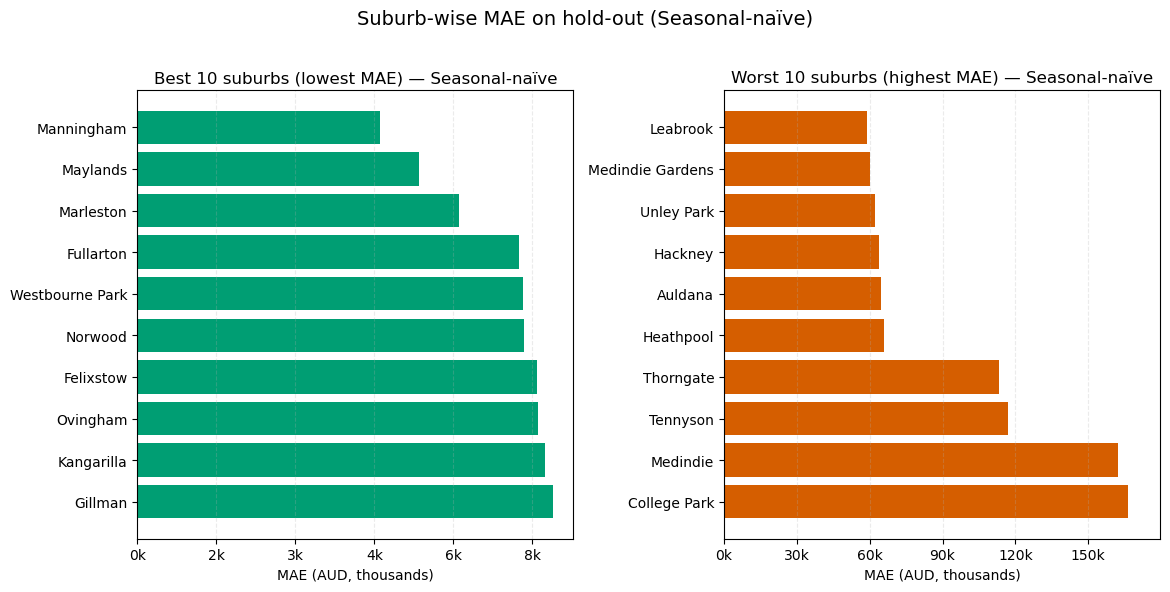

In [73]:
# === Fig R4 (pretty x-axes): tidy tick formatting & spacing ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
from pathlib import Path

assert 'test' in globals(), "Need the 'test' DataFrame with Suburb, MedianPrice, and pred_*."

# Pick model column (prefer Ridge if present)
def _r2(y, yhat):
    y, yhat = np.asarray(y), np.asarray(yhat)
    ss_res = np.sum((y - yhat)**2); ss_tot = np.sum((y - np.mean(y))**2)
    return float(1 - ss_res/ss_tot) if ss_tot > 0 else np.nan

y = test['MedianPrice'].to_numpy()
cand = [c for c in test.columns if c.startswith('pred_')]
if 'pred_ridge' in test.columns:
    best_col, model_name = 'pred_ridge', 'Ridge'
else:
    scores = {c: _r2(y, test[c].to_numpy()) for c in cand}
    best_col = max(scores, key=lambda k: np.nan_to_num(scores[k], nan=-1e9))
    model_name = {'pred_snaive':'Seasonal-naïve','pred_mean':'Mean baseline'}.get(
        best_col, best_col.replace('pred_','').replace('_',' ').title()
    )

# MAE by suburb
by_suburb = (
    test.assign(err=(test['MedianPrice'] - test[best_col]).abs())
        .groupby('Suburb', as_index=True)
        .agg(MAE=('err','mean'))
        .sort_values('MAE', ascending=True)
)
best10  = by_suburb.head(10)
worst10 = by_suburb.tail(10).sort_values('MAE')

# Color palette
COL = {"green":"#009E73", "verm":"#D55E00", "grey":"#777777"}

# Tick formatter: 23,500 -> "24k"
kfmt = FuncFormatter(lambda x, pos: f"{int(round(x/1000.0))}k")

fig, axes = plt.subplots(1, 2, figsize=(11.8, 6), sharex=False)

# Left: best 10
axes[0].barh(best10.index, best10['MAE'], color=COL["green"])
axes[0].invert_yaxis()
axes[0].set_title(f"Best 10 suburbs (lowest MAE) — {model_name}")
axes[0].set_xlabel("MAE (AUD, thousands)")
axes[0].xaxis.set_major_formatter(kfmt)
axes[0].xaxis.set_major_locator(MaxNLocator(nbins=6))
axes[0].grid(True, axis='x', linestyle='--', alpha=0.25)

# Right: worst 10
axes[1].barh(worst10.index, worst10['MAE'], color=COL["verm"])
axes[1].invert_yaxis()
axes[1].set_title(f"Worst 10 suburbs (highest MAE) — {model_name}")
axes[1].set_xlabel("MAE (AUD, thousands)")
axes[1].xaxis.set_major_formatter(kfmt)
axes[1].xaxis.set_major_locator(MaxNLocator(nbins=6))
axes[1].grid(True, axis='x', linestyle='--', alpha=0.25)
axes[1].set_xlim(0, worst10['MAE'].max()*1.08)  # a little headroom

fig.suptitle(f"Suburb-wise MAE on hold-out ({model_name})", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96])

Path("figures").mkdir(parents=True, exist_ok=True)
out = Path("figures")/f"Fig_R4_Suburb_MAE_{test_year}_{model_name}_prettyTicks.png"
fig.savefig(out, dpi=300); fig.savefig(out.with_suffix(".pdf"))
print("Saved:", out.resolve())
